In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


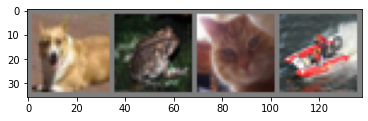

  dog  frog   cat  ship


In [15]:
import numpy as np
import matplotlib.pyplot as plt
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [30]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 100, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(100, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [31]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [32]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.067
[1,  4000] loss: 1.702
[1,  6000] loss: 1.541
[1,  8000] loss: 1.467
[1, 10000] loss: 1.404
[1, 12000] loss: 1.343
[2,  2000] loss: 1.268
[2,  4000] loss: 1.234
[2,  6000] loss: 1.219
[2,  8000] loss: 1.166
[2, 10000] loss: 1.187
[2, 12000] loss: 1.118
Finished Training


In [41]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [42]:
dataiter = iter(testloader)
images, labels = dataiter.next()


In [43]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [44]:
_, predicted = torch.max(outputs, 1)


In [45]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


Accuracy of plane : 76 %
Accuracy of   car : 74 %
Accuracy of  bird : 41 %
Accuracy of   cat : 41 %
Accuracy of  deer : 52 %
Accuracy of   dog : 46 %
Accuracy of  frog : 78 %
Accuracy of horse : 62 %
Accuracy of  ship : 81 %
Accuracy of truck : 65 %
['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
[76.6, 74.7, 41.1, 41.8, 52.9, 46.0, 78.5, 62.0, 81.8, 65.4]


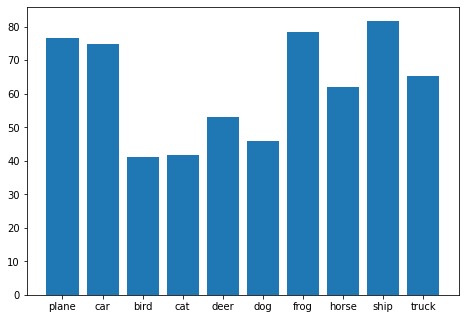

In [40]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
class_name = []
class_accuracy = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    class_name.append(classes[i])
    class_accuracy.append(100 * class_correct[i] / class_total[i])

print(class_name)
print(class_accuracy)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(class_name,class_accuracy)
plt.show()
    